<IPython.core.display.Javascript object>


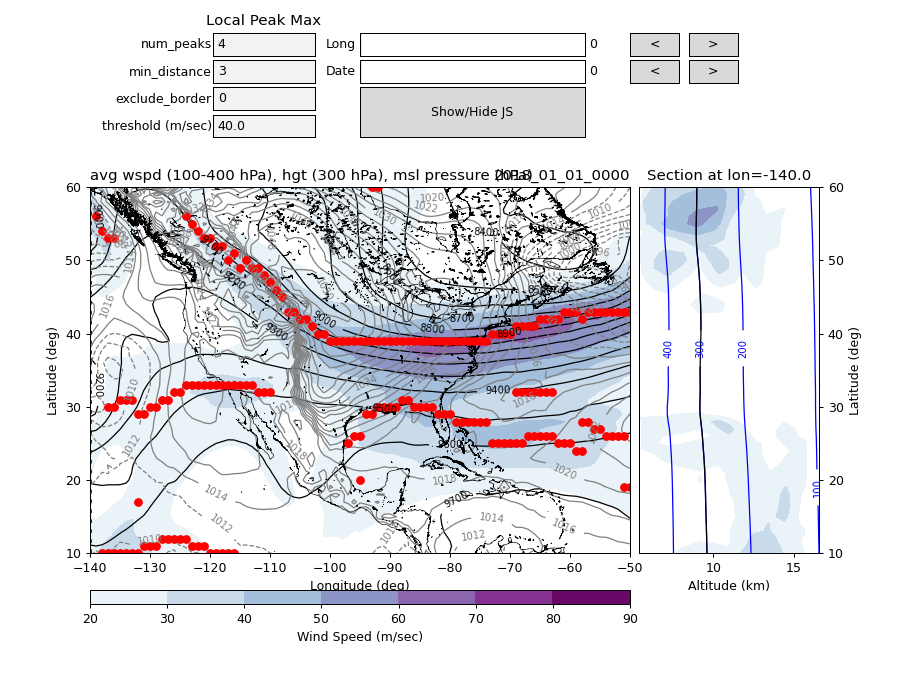

Reading ERA5 data from: http://whewell.marine.unc.edu/dods/era5/test
['longitude', 'latitude', 'level', 'time', 'z']
['longitude', 'latitude', 'level', 'time', 'u']
['longitude', 'latitude', 'level', 'time', 'v']
['longitude', 'latitude', 'time', 'msl']


In [2]:
%matplotlib notebook
%run jsviz.py 2018_01